In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import seaborn as sns 

from sklearn import metrics 
from scipy.stats import skew, norm 

%matplotlib inline 

from pandas.plotting import scatter_matrix 
from sklearn.cluster import KMeans 

from sklearn.preprocessing import LabelEncoder 

from sklearn.metrics import accuracy_score 
from sklearn.metrics import make_scorer 

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold, cross_val_score

from warnings import filterwarnings as filt 

filt('ignore')
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

In [2]:
# Load dataset
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [3]:
pharma_data.head().T

,0,1,2,3,4
ID_Patient_Care_Situation,22374,18164,6283,5339,33012
Diagnosed_Condition,8,5,23,51,0
Patient_ID,3333,5740,10446,12011,12513
Treated_with_drugs,DX6,DX2,DX6,DX1,NaN
Patient_Age,56,36,48,5,128
Patient_Body_Mass_Index,18.479385,22.945566,27.510027,19.130976,1.3484
Patient_Smoker,YES,YES,YES,NO,Cannot say
Patient_Rural_Urban,URBAN,RURAL,RURAL,URBAN,RURAL
Patient_mental_condition,Stable,Stable,Stable,Stable,Stable
A,1.0,1.0,1.0,1.0,0.0


In [4]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [5]:
pharma_data.Treated_with_drugs.value_counts()

Treated_with_drugs
DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: count, dtype: int64

In [6]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].str.upper()

In [7]:
pharma_data.Patient_Smoker.value_counts()

Patient_Smoker
NO            13246
YES            9838
Cannot say       13
Name: count, dtype: int64

In [8]:
def change(x):
  if x == 'NO':
    return 'NO'
  if  x == 'YES' or x == 'YESS':
    return 'YES'
  if x == 'CANNOT SAY':
    return 'CANNOT SAY'

In [9]:
pharma_data.Patient_Smoker = pharma_data.Patient_Smoker.apply(change)

In [10]:
pharma_data.Patient_Rural_Urban.value_counts()

Patient_Rural_Urban
RURAL    16134
URBAN     6963
Name: count, dtype: int64

In [11]:
pharma_data.Patient_mental_condition.value_counts()

Patient_mental_condition
Stable    23097
Name: count, dtype: int64

## Handling Missing Values 

In [12]:
pharma_data['Treated_with_drugs'].mode()

0    DX6
Name: Treated_with_drugs, dtype: object

In [13]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode()[0])

pharma_data['Number_of_prev_cond'] = pharma_data["Number_of_prev_cond"].fillna(pharma_data['Number_of_prev_cond'].mode()[0])

pharma_data["Patient_Smoker"] = pharma_data["Patient_Smoker"].fillna(pharma_data['Patient_Smoker'].mode()[0])

In [14]:
pharma_data['A'].fillna(pharma_data['A'].mode()[0],inplace=True)
pharma_data['B'].fillna(pharma_data['B'].mode()[0],inplace=True)
pharma_data['C'].fillna(pharma_data['C'].mode()[0],inplace=True)
pharma_data['D'].fillna(pharma_data['D'].mode()[0],inplace=True)
pharma_data['E'].fillna(pharma_data['E'].mode()[0],inplace=True)
pharma_data['F'].fillna(pharma_data['F'].mode()[0],inplace=True)
pharma_data['Z'].fillna(pharma_data['Z'].mode()[0],inplace=True)

In [15]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

## Data Visualization

In [16]:
numeric_data = pharma_data[['Diagnosed_Condition','Patient_Age','Patient_Body_Mass_Index','Number_of_prev_cond','Survived_1_year']]
numeric_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,2.0,0
1,5,36,22.945566,1.0,1
2,23,48,27.510027,1.0,0
3,51,5,19.130976,1.0,1
4,0,128,1.348400,1.0,1


In [17]:
numeric_data.isnull().sum()

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

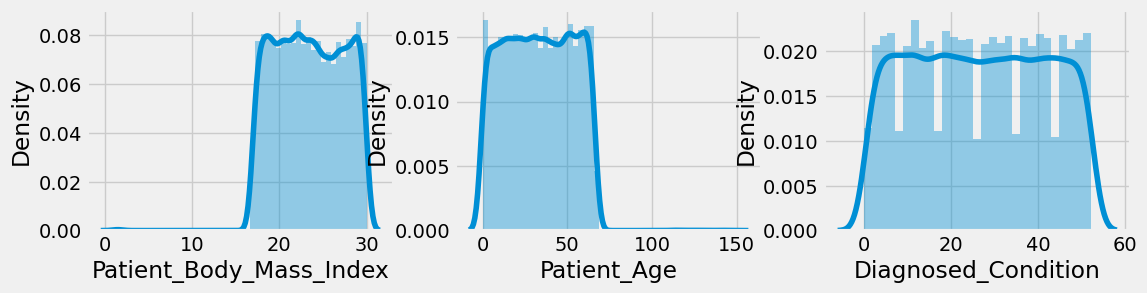

In [18]:
plt.figure(figsize=(12,6))

plt.subplot(231)
sns.distplot(numeric_data['Patient_Body_Mass_Index'])

plt.subplot(232)
sns.distplot(numeric_data['Patient_Age'])

plt.subplot(233)
sns.distplot(numeric_data['Diagnosed_Condition'])

plt.show()

In [19]:

numeric_data.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000
mean,26.413127,33.209768,23.454820,1.710352,0.632247
std,15.030865,19.549882,3.807661,0.768216,0.482204
min,0.000000,0.000000,1.089300,1.000000,0.000000
25%,13.000000,16.000000,20.205550,1.000000,0.000000
50%,26.000000,33.000000,23.386199,2.000000,1.000000
75%,39.000000,50.000000,26.788154,2.000000,1.000000
max,52.000000,149.000000,29.999579,5.000000,1.000000


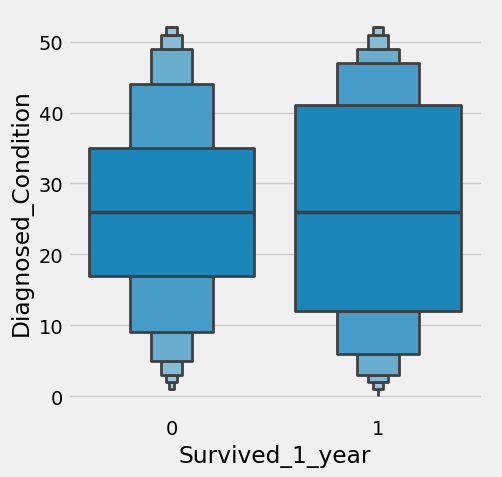

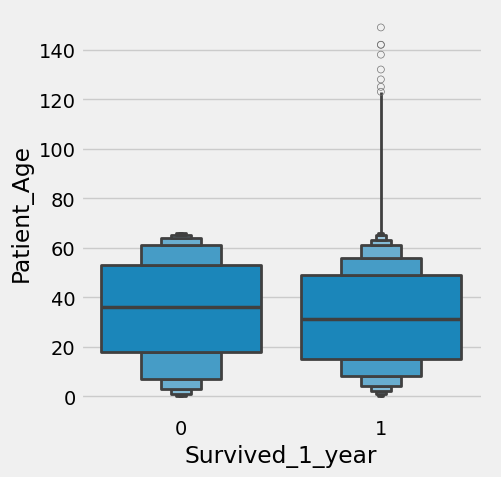

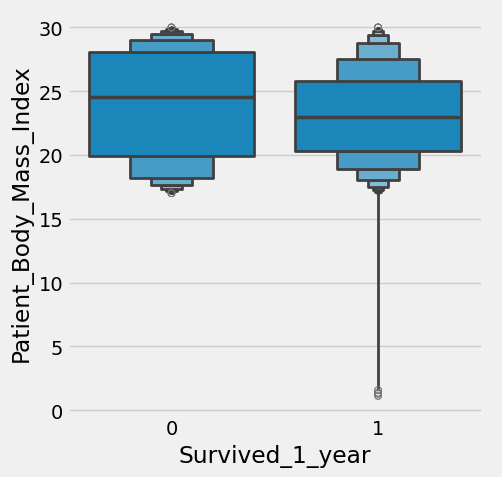

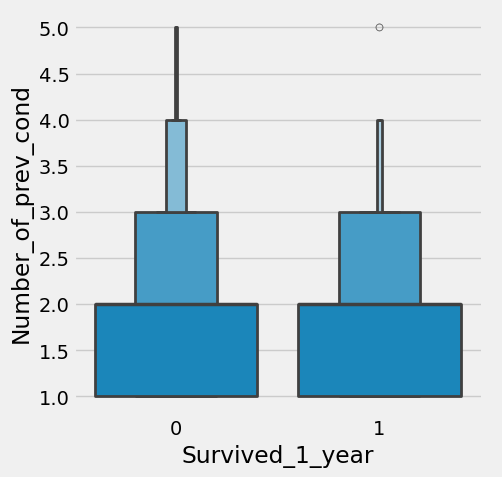

In [20]:
for feature in numeric_data.drop('Survived_1_year', axis = 1).columns:
  sns.catplot(x='Survived_1_year', y = feature, data=numeric_data,kind = 'boxen')
  plt.show()

## Correlation and hisstogram Analysis 

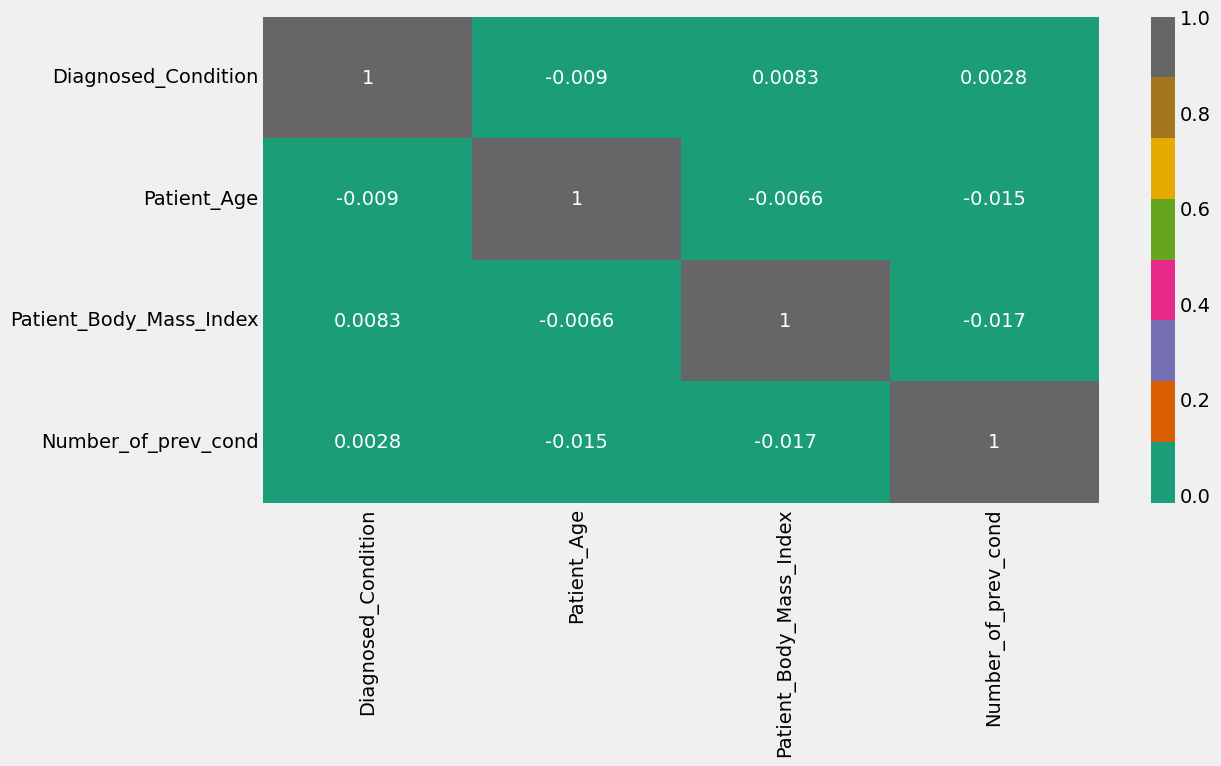

In [21]:
numeric_data = numeric_data.drop(['Survived_1_year'], axis = 1)
sns.heatmap(numeric_data.corr(), cmap='Dark2', annot = True) 
plt.show()

In [22]:
categorical_data = pharma_data.drop(numeric_data.columns, axis = 1)

categorical_data.drop(['Patient_ID','ID_Patient_Care_Situation'], axis = 1, inplace = True)

categorical_data.head()

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Survived_1_year
0,DX6,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,DX2,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,DX6,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,DX1,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,DX6,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


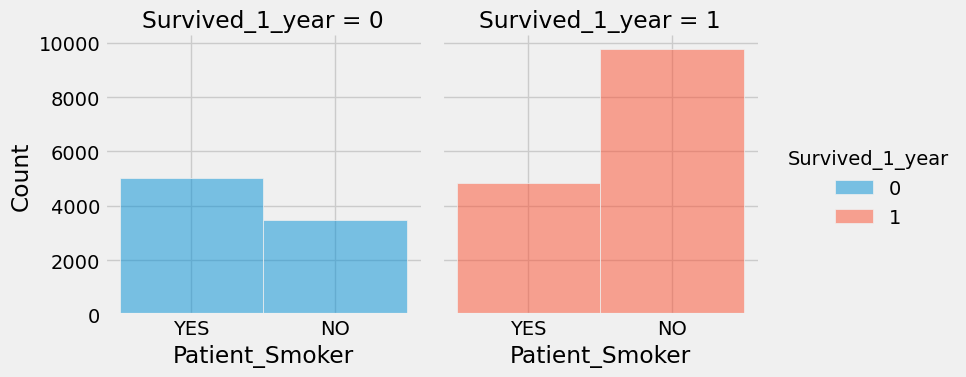

<Figure size 1500x500 with 0 Axes>

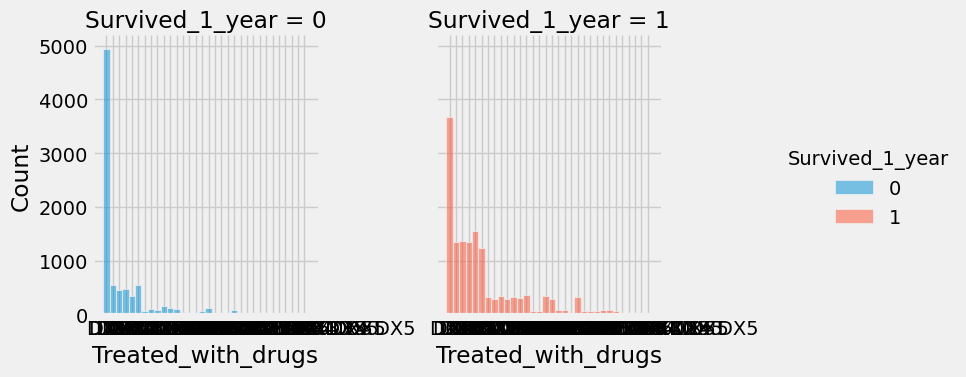

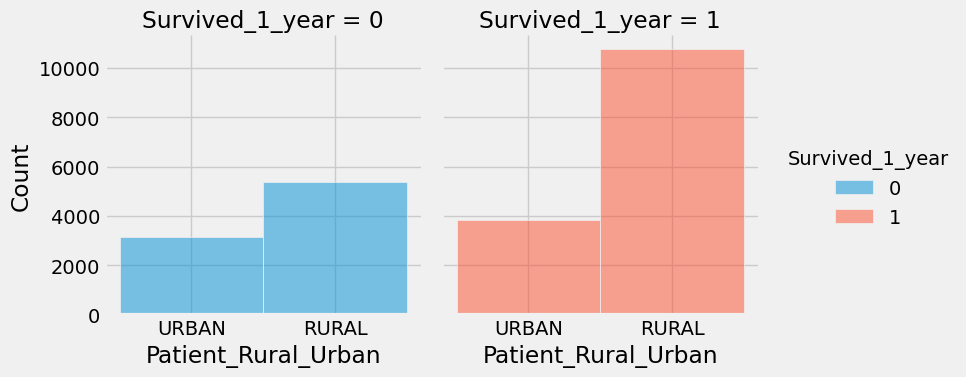

<Figure size 1500x500 with 0 Axes>

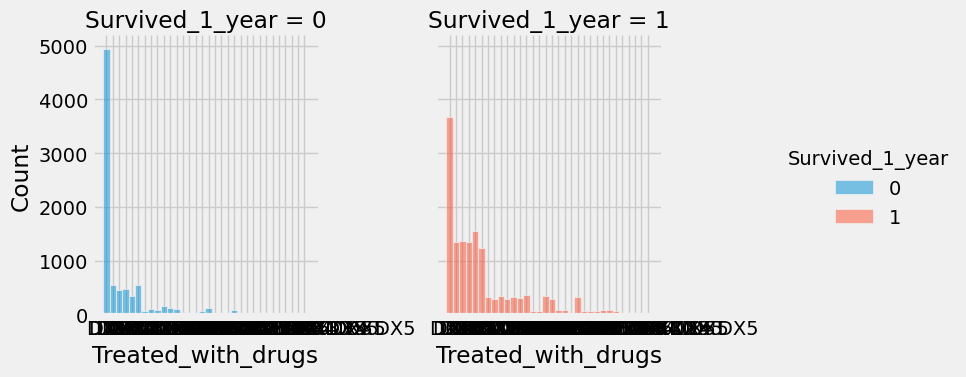

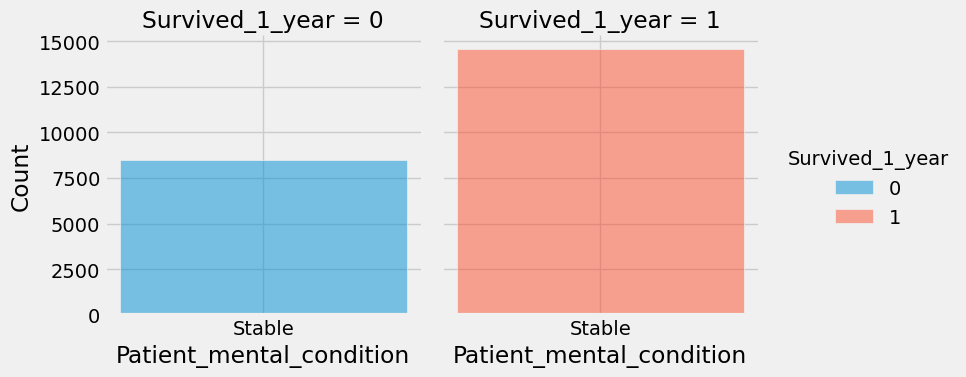

<Figure size 1500x500 with 0 Axes>

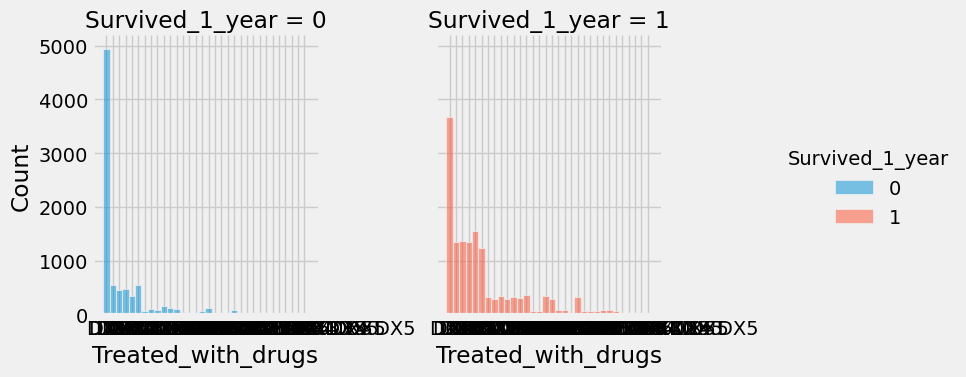

In [23]:
# Visualization of categorical columns

for feature in ['Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition']:
  sns.displot(x=feature, hue='Survived_1_year', data=categorical_data, col='Survived_1_year', height=4);

  plt.figure(figsize=(15,5))
  sns.displot(x='Treated_with_drugs',hue='Survived_1_year', data = categorical_data, col='Survived_1_year', height=4)

plt.show()
  

## Pre-processing and Data Cleaning of Categorical cariable 

In [24]:
drugs = pharma_data['Treated_with_drugs'].str.get_dummies(sep=' ')

drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [25]:
pharma_data = pharma_data.drop(['Treated_with_drugs','A','B','C','D','E','F','Z','ID_Patient_Care_Situation','Patient_ID'], axis=1)
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,YES,URBAN,Stable,2.0,0
1,5,36,22.945566,YES,RURAL,Stable,1.0,1
2,23,48,27.510027,YES,RURAL,Stable,1.0,0
3,51,5,19.130976,NO,URBAN,Stable,1.0,1
4,0,128,1.348400,NO,RURAL,Stable,1.0,1


In [26]:
pharma_data.Patient_Smoker.value_counts()

Patient_Smoker
NO     13259
YES     9838
Name: count, dtype: int64

In [27]:

pharma_data.Patient_Smoker[pharma_data['Patient_Smoker'] == 'Cannot say'] = 'NO'

In [28]:
pharma_data.drop('Patient_mental_condition', axis = 1, inplace = True)

In [29]:
pharma_data = pd.get_dummies(pharma_data, columns=['Patient_Smoker','Patient_Rural_Urban'])

In [30]:
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,56,18.479385,2.0,0,False,True,False,True
1,5,36,22.945566,1.0,1,False,True,True,False
2,23,48,27.510027,1.0,0,False,True,True,False
3,51,5,19.130976,1.0,1,True,False,False,True
4,0,128,1.348400,1.0,1,True,False,True,False


In [31]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        23097 non-null  int64  
 1   Patient_Age                23097 non-null  int64  
 2   Patient_Body_Mass_Index    23097 non-null  float64
 3   Number_of_prev_cond        23097 non-null  float64
 4   Survived_1_year            23097 non-null  int64  
 5   Patient_Smoker_NO          23097 non-null  bool   
 6   Patient_Smoker_YES         23097 non-null  bool   
 7   Patient_Rural_Urban_RURAL  23097 non-null  bool   
 8   Patient_Rural_Urban_URBAN  23097 non-null  bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 992.6 KB


## Prepare Train/Test Data

In [32]:
# Separate targets from predictions 
x = pharma_data.drop('Survived_1_year', axis=1)
y = pharma_data['Survived_1_year']


In [33]:
x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state = 3)

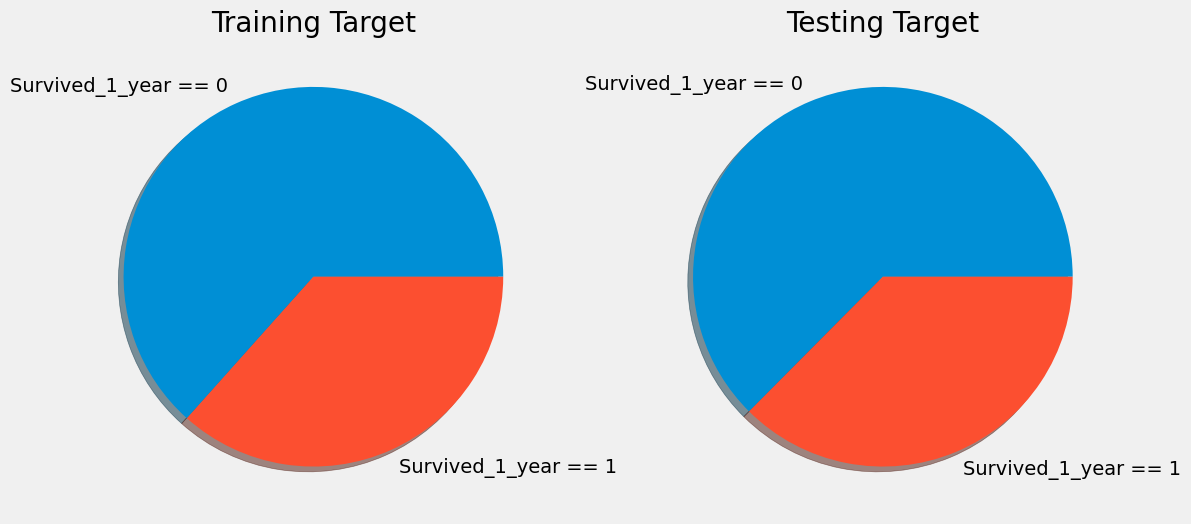

In [34]:
fig,ax=plt.subplots(1,2)
ax[0].pie(y_train.value_counts(),labels = ['Survived_1_year == 0', 'Survived_1_year == 1'],shadow = True)
ax[0].set_title('Training Target')
ax[1].pie(y_test.value_counts(),labels = ['Survived_1_year == 0', 'Survived_1_year == 1'], shadow = True);
ax[1].set_title('Testing Target')

plt.show()

In [35]:
x.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,56,18.479385,2.0,False,True,False,True
1,5,36,22.945566,1.0,False,True,True,False
2,23,48,27.510027,1.0,False,True,True,False
3,51,5,19.130976,1.0,True,False,False,True
4,0,128,1.348400,1.0,True,False,True,False


In [36]:

import eli5
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
import pdpbox
from pdpbox.pdp import *
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
import shap
from shap import TreeExplainer
from scipy.special import expit
from shap import force_plot, TreeExplainer, initjs

In [37]:
def correlation(pharma_data, tol=0.6):
    corr = pharma_data.corr().abs()

    mean_corr = corr.mean()

    up_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    drop = []

    for row in range(corr.shape[0] - 1):
        col_ind = row + 1 
        for col in range(col_ind, corr.shape[1]):
            if corr.iloc[row, col] > tol: 
                drop.append(row) if mean_corr.iloc[row] > mean_corr.iloc[col] else drop.append(col)

    return pharma_data.columns[list(set(drop))]

In [38]:
high_corr_feats = correlation(pharma_data)
high_corr_feats

Index(['Patient_Rural_Urban_URBAN', 'Patient_Smoker_YES'], dtype='object')

In [39]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

def permImp(x, y):
    model = RandomForestClassifier().fit(x, y) 
    perm = PermutationImportance(model).fit(x, y) 
    return show_weights(perm, feature_names = x.columns.tolist())

def plot_mi(score):
    score = score.sort_values('mi_score', ascending=True)

    plt.barh(score.index, score.mi_score)

    plt.title('mutual info classifier')
    plt.show()
    return 

def mi_score(x, y):
    score = pd.DataFrame(mutual_info_classif(x, y, discrete_features=False),
                        index = x.columns, columns=['mi_score']).sort_values('mi_score', ascending=False)

    plot_mi(score)

    return score 


In [40]:
from eli5.sklearn import PermutationImportance
permImp(x_train, y_train)

Weight,Feature
0.2827 ± 0.0065,Patient_Body_Mass_Index
0.2641 ± 0.0040,Diagnosed_Condition
0.2118 ± 0.0025,Patient_Age
0.1389 ± 0.0037,Number_of_prev_cond
0.0741 ± 0.0036,Patient_Smoker_NO
0.0485 ± 0.0023,Patient_Rural_Urban_RURAL
0.0464 ± 0.0023,Patient_Smoker_YES
0.0385 ± 0.0016,Patient_Rural_Urban_URBAN


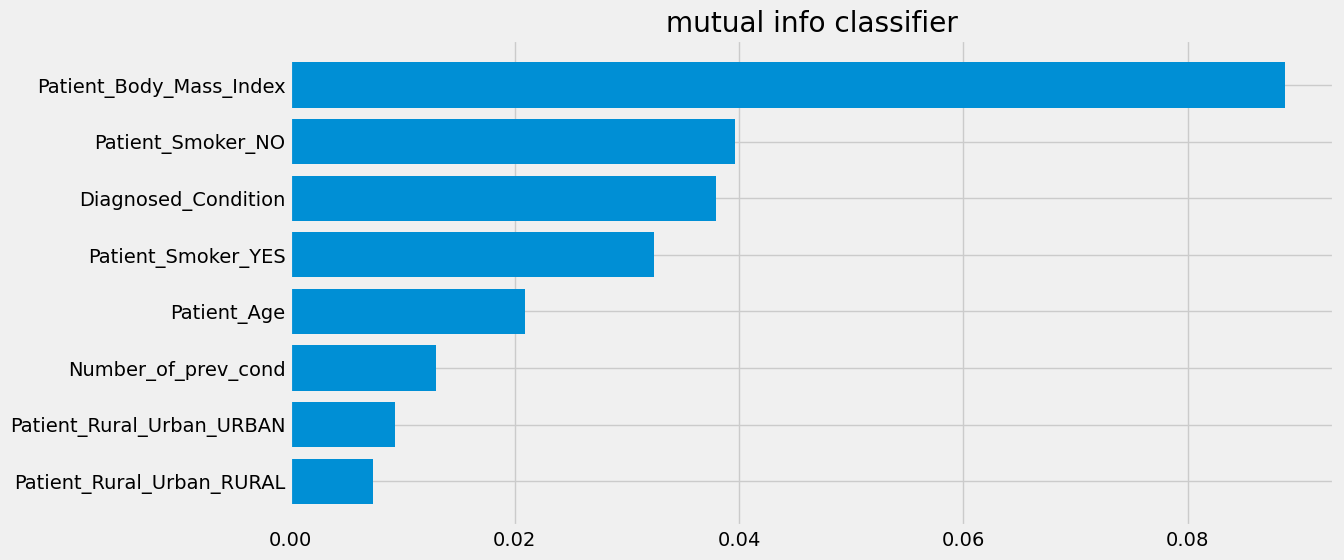

In [41]:
mscore = mi_score(x_train, y_train)

In [42]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
#from sklearn_pandas import DataFrameMapper
#from sklearn_pandas import CategoricalImputer
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing as pre
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from warnings import filterwarnings as filt

In [43]:
def best_model(x, y, fold=10):
    models = [LogisticRegression(), RidgeClassifier(), SVC(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
    mnames = ['logistic regg', 'ridge clf', 'svm', 'naive bayes', 'knn', 'decision tree', 'random forest']

    scalers = [None, StandardScaler(), RobustScaler(), MinMaxScaler()]
    snames = ['none', 'std', 'robust', 'minmax'] 
    scores = [[] for _ in range(4)]

    total = len(models) * len(scalers)

    for model in models:
        for ind, scaler in enumerate(scalers):
          if scaler:
            model = Pipeline(steps = [('scaler', scaler),('model', model)])
            cv = StratifiedKFold(n_splits = fold, shuffle = True)
            score = cross_val_score(model, x, y, cv = cv, scoring = 'f1_micro').mean()
            scores[ind].append(score)
  
    return pd.DataFrame(scores, index = snames, columns = mnames).T

    

In [44]:
best_model(x_train, y_train)

,none,std,robust,minmax
logistic regg,NaN,0.694865,0.695514,0.694323
ridge clf,NaN,0.694539,0.693835,0.693890
svm,NaN,0.733290,0.733452,0.733343
naive bayes,NaN,0.690804,0.690263,0.691074
knn,NaN,0.734427,0.731992,0.734535
decision tree,NaN,0.680628,0.677978,0.680252
random forest,NaN,0.748010,0.745522,0.748175


In [45]:
best_model(x_train.drop(high_corr_feats, axis=1), y_train)

,none,std,robust,minmax
logistic regg,NaN,0.695027,0.694864,0.694972
ridge clf,NaN,0.694104,0.694593,0.694322
svm,NaN,0.737891,0.736483,0.736916
naive bayes,NaN,0.718298,0.718407,0.719220
knn,NaN,0.732965,0.733397,0.733182
decision tree,NaN,0.681713,0.679818,0.680305
random forest,NaN,0.749094,0.747903,0.748119


In [46]:
print(y_train.value_counts())
print(y_test.value_counts())

Survived_1_year
1    11675
0     6802
Name: count, dtype: int64
Survived_1_year
1    2928
0    1692
Name: count, dtype: int64


In [47]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE()

new_x_train, new_y_train = smote.fit_resample(x_train, y_train)

new_x_train.shape, new_y_train.shape



((23350, 8), (23350,))

In [48]:
new_y_train.value_counts()

Survived_1_year
1    11675
0    11675
Name: count, dtype: int64

In [49]:
best_model(new_x_train, new_y_train)

,none,std,robust,minmax
logistic regg,NaN,0.678630,0.678758,0.678287
ridge clf,NaN,0.677602,0.677816,0.677216
svm,NaN,0.752248,0.751863,0.752934
naive bayes,NaN,0.652934,0.653619,0.653276
knn,NaN,0.771349,0.773062,0.771135
decision tree,NaN,0.740814,0.740814,0.739486
random forest,NaN,0.801799,0.801199,0.803597


In [50]:
best_model(new_x_train.drop(high_corr_feats, axis = 1), new_y_train)

,none,std,robust,minmax
logistic regg,NaN,0.613148,0.613747,0.613362
ridge clf,NaN,0.613319,0.613448,0.612848
svm,NaN,0.713576,0.712591,0.711263
naive bayes,NaN,0.648137,0.647966,0.648137
knn,NaN,0.735332,0.737559,0.736360
decision tree,NaN,0.724111,0.728009,0.726681
random forest,NaN,0.791049,0.789379,0.791734


In [51]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [52]:
pred = model.predict(x_test) 

print(f1_score(y_test, pred))

0.7816761146008886


In [53]:
model2 = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

model2.fit(x_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_pred = model2.predict(x_test)

fscore = f1_score(y_test, y_pred)
fscore

0.8267229678781481

In [55]:
# to read test dataset
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
     

In [56]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:

# to view shape
test_data.shape

(9303, 17)

In [58]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [59]:
test_data = test_data.drop(['Treated_with_drugs','A','B','C','D','E','F','Z','ID_Patient_Care_Situation','Patient_ID'], axis = 1)

In [60]:
test_data.Patient_Smoker[test_data['Patient_Smoker'] == 'Cannot say'] == 'NO'

Series([], Name: Patient_Smoker, dtype: bool)

In [61]:
test_data = test_data.drop(['Patient_mental_condition'], axis = 1)

In [62]:
test_data = pd.get_dummies(test_data, columns=["Patient_Smoker","Patient_Rural_Urban"])
test_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,40,16,29.443894,2.0,True,False,True,False
1,52,24,26.836321,2.0,True,False,False,True
2,50,63,25.523280,2.0,True,False,True,False
3,32,42,27.171155,3.0,True,False,False,True
4,20,50,25.556192,1.0,True,False,True,False


In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        9303 non-null   int64  
 1   Patient_Age                9303 non-null   int64  
 2   Patient_Body_Mass_Index    9303 non-null   float64
 3   Number_of_prev_cond        9303 non-null   float64
 4   Patient_Smoker_NO          9303 non-null   bool   
 5   Patient_Smoker_YES         9303 non-null   bool   
 6   Patient_Rural_Urban_RURAL  9303 non-null   bool   
 7   Patient_Rural_Urban_URBAN  9303 non-null   bool   
dtypes: bool(4), float64(2), int64(2)
memory usage: 327.2 KB


In [64]:
#to check missing values in entire test dataset
test_data.isna().sum().sum()

np.int64(0)

In [65]:

test_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,40,16,29.443894,2.0,True,False,True,False
1,52,24,26.836321,2.0,True,False,False,True
2,50,63,25.523280,2.0,True,False,True,False
3,32,42,27.171155,3.0,True,False,False,True
4,20,50,25.556192,1.0,True,False,True,False


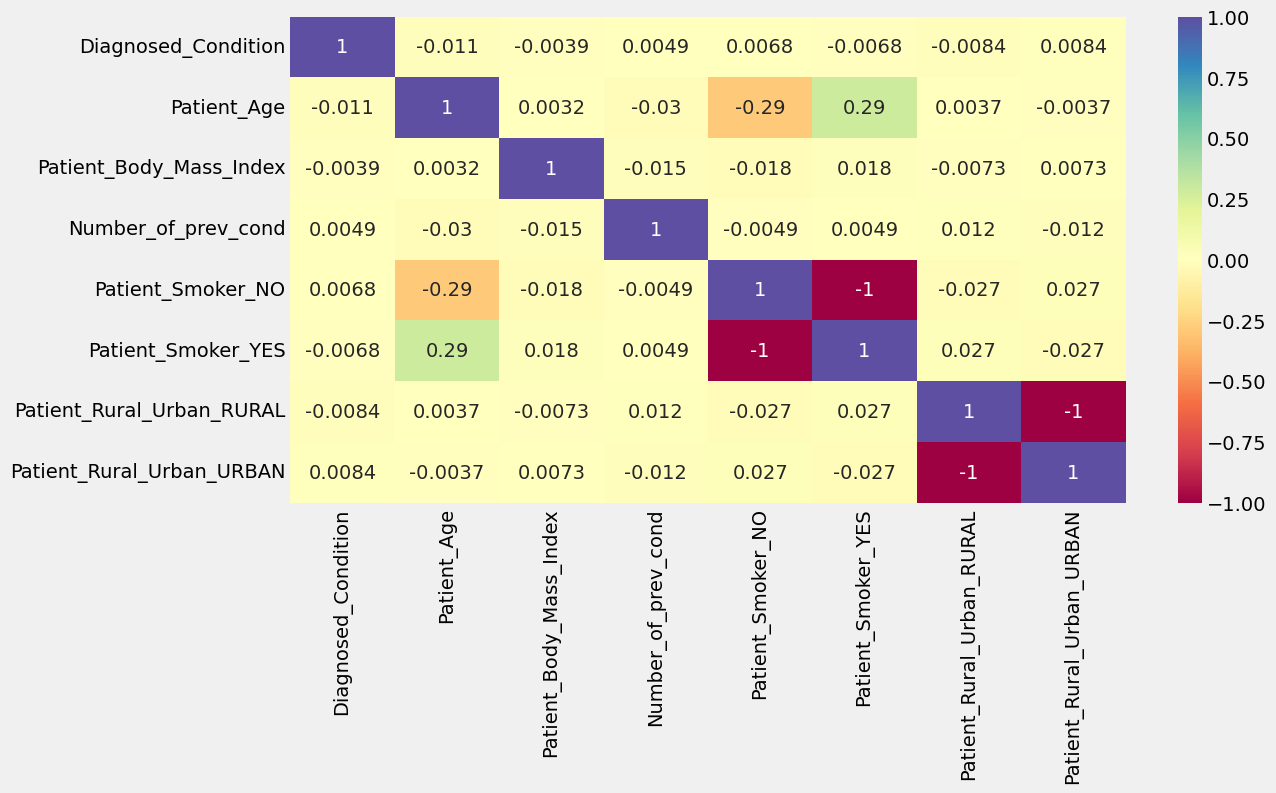

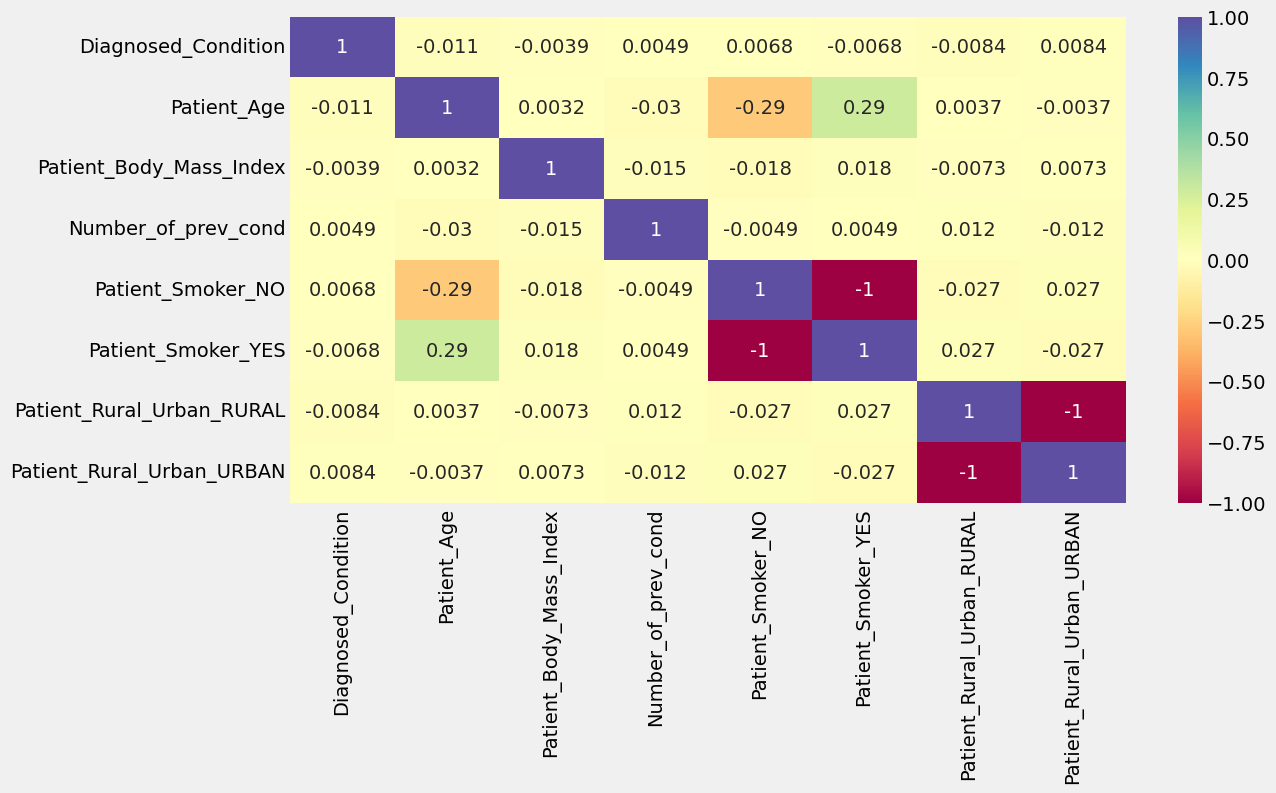

In [68]:
plt.figure(figsize= (12, 6))
sns.heatmap(test_data.corr(), annot= True, cmap='Spectral')
plt.show()

In [69]:
y_pred = model2.predict(test_data)
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(9303,))

In [70]:
y_pred = model2.predict(test_data)


In [71]:
predictions = y_pred

In [72]:
res = pd.DataFrame(predictions)
res.columns = ["prediction"]
res.to_csv("summission.csv", index=False)
